<a href="https://colab.research.google.com/github/bayuryunarko/Data-visualization/blob/main/VD_Pemasaran_Bunga_Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eksplorasi Data Pemasaran Bunga Di Jakarta

In [1]:
# Import module yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload file dataset
from google.colab import files
uploaded = files.upload()

Saving data-jumlah-omzet-pemasaran-bunga-dan-tanaman-hias-di-dki-jakarta-bulan-januari-tahun-2019.csv to data-jumlah-omzet-pemasaran-bunga-dan-tanaman-hias-di-dki-jakarta-bulan-januari-tahun-2019 (1).csv


In [18]:
# Mengubah dataset menjadi bentuk dataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded['data-jumlah-omzet-pemasaran-bunga-dan-tanaman-hias-di-dki-jakarta-bulan-januari-tahun-2019.csv']))
df.head()

,lokasi_penjualan,jenis_komoditi,omzet
0,Pasar Bunga Rawabelong,Melati,465200000
1,Pasar Bunga Rawabelong,Pihong,32365000
2,Pasar Bunga Rawabelong,Kenanga,10725000
3,Pasar Bunga Rawabelong,Kantil,1850000
4,Pasar Bunga Rawabelong,Ros Kampung/Ros Cipanas,300000


In [19]:
df = df.drop(df[df.omzet == 0].index).reset_index()
df

,index,lokasi_penjualan,jenis_komoditi,omzet
0,0,Pasar Bunga Rawabelong,Melati,465200000
1,1,Pasar Bunga Rawabelong,Pihong,32365000
2,2,Pasar Bunga Rawabelong,Kenanga,10725000
3,3,Pasar Bunga Rawabelong,Kantil,1850000
4,4,Pasar Bunga Rawabelong,Ros Kampung/Ros Cipanas,300000
...,...,...,...,...
177,200,Penangkar Bibit Ragunan,sirih merah,1960000
178,201,Penangkar Bibit Ragunan,sirih hijau,1600000
179,202,Penangkar Bibit Ragunan,sirih kuning,2400000
180,203,Penangkar Bibit Ragunan,cabe merah,8000000


In [20]:
del df['index']

In [21]:
df

,lokasi_penjualan,jenis_komoditi,omzet
0,Pasar Bunga Rawabelong,Melati,465200000
1,Pasar Bunga Rawabelong,Pihong,32365000
2,Pasar Bunga Rawabelong,Kenanga,10725000
3,Pasar Bunga Rawabelong,Kantil,1850000
4,Pasar Bunga Rawabelong,Ros Kampung/Ros Cipanas,300000
...,...,...,...
177,Penangkar Bibit Ragunan,sirih merah,1960000
178,Penangkar Bibit Ragunan,sirih hijau,1600000
179,Penangkar Bibit Ragunan,sirih kuning,2400000
180,Penangkar Bibit Ragunan,cabe merah,8000000


In [22]:
# Mengetahui deskripsi dari dataset
df.describe()

,omzet
count,1.820000e+02
mean,6.080854e+07
std,1.974799e+08
min,7.500000e+04
25%,9.000000e+05
50%,2.635000e+06
75%,3.887750e+07
max,2.242500e+09


In [24]:
df['omzet'].sum()

11067154500

------

## Mengetahui jumlah omzet data berdasarakan lokasi penjualan

In [25]:
# Menampilkan tabel jumlah omzet tiap lokasi
df_sum_omzet_lokasi = df.groupby('lokasi_penjualan').sum()
df_sum_omzet_lokasi = df_sum_omzet_lokasi.reset_index(level='lokasi_penjualan')
df_sum_omzet_lokasi

,lokasi_penjualan,omzet
0,Pasar Bunga Rawabelong,7676920000
1,Penangkar Bibit Ragunan,351730000
2,TC Klender,43554500
3,Taman Anggrek Ragunan,2994950000


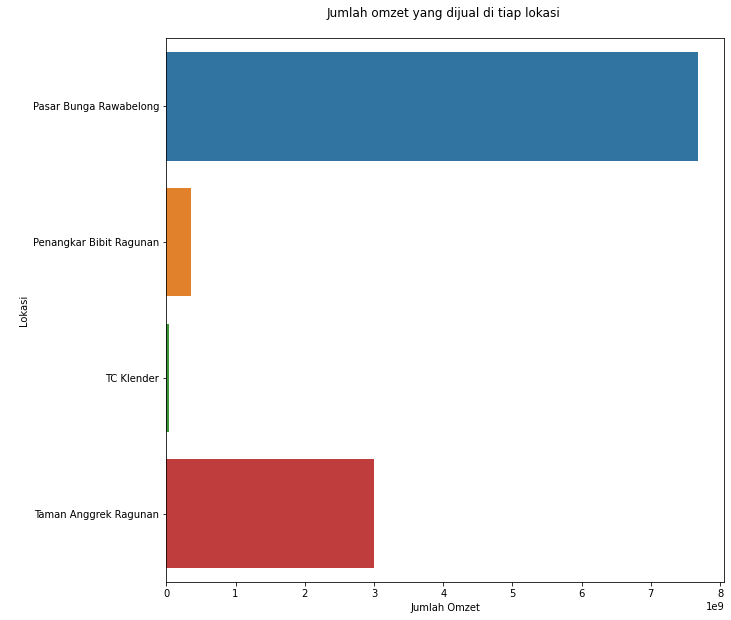

In [26]:
# Menampilkan grafik jumlah omzet tiap lokasi
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Plot the total crashes
sns.set_color_codes("pastel")

sns.barplot(x='omzet', y='lokasi_penjualan', data=df_sum_omzet_lokasi)
ax.set_title('Jumlah omzet yang dijual di tiap lokasi \n')
ax.set_ylabel('\nLokasi')
ax.set_xlabel('Jumlah Omzet')
plt.show()

Dari tabel dan grafik dapat dilihat bahwa Pasar Bunga Rawabelong jumlah omzet yang didapat paling banyak daripada pasar yang lainnya.

---

## Mengetahui jumlah omzet berdasarkan jenis komoditi

In [27]:
# Menampilkan tabel jumlah omzet tiap lokasi
df_sum_omzet_jenis = df.groupby('jenis_komoditi').sum()
df_sum_omzet_jenis = df_sum_omzet_jenis.reset_index(level='jenis_komoditi')
df_sum_omzet_jenis

,jenis_komoditi,omzet
0,Agapantus,750000
1,Alpukat,600000
2,Andong,452325000
3,Anggrek Bulan,244340000
4,Anggrek Dedrobium,95200000
...,...,...
163,sawo kecik,1200000
164,sirih hijau,1600000
165,sirih kuning,2400000
166,sirih merah,1960000


In [28]:
df_sum_omzet_jenis.describe()

,omzet
count,1.680000e+02
mean,6.587592e+07
std,2.051862e+08
min,7.500000e+04
25%,7.875000e+05
50%,3.075000e+06
75%,4.135500e+07
max,2.242500e+09


In [29]:
# Jenis komoditi yang memiliki jumlah omzet paling besar
a = df_sum_omzet_jenis['omzet'] ==  df_sum_omzet_jenis['omzet'].max()
df_sum_omzet_jenis[a]

,jenis_komoditi,omzet
127,Tanaman Hias Lainnya,2242500000


In [30]:
# Jenis komoditi yang memiliki jumlah omzet di atas 200 juta
a = df_sum_omzet_jenis['omzet'] >= 200000000
df_sum_omzet_jenis[a]

,jenis_komoditi,omzet
2,Andong,452325000
3,Anggrek Bulan,244340000
10,Asparagus,304700000
26,Casablanca,480125000
33,Dendrobium,238050000
61,Kemuning,243030000
64,Krisan Std (PT),219025000
79,Melati,465200000
94,Phalanopsis,481750000
98,Pilo Dendro,222098000


In [31]:
# Jenis komoditi yang jumlah omzet nya paling rendah
a = df_sum_omzet_jenis['omzet'] ==  df_sum_omzet_jenis['omzet'].min()
df_sum_omzet_jenis[a]

,jenis_komoditi,omzet
9,Asem Mansis,75000
42,Jahor jaba/anggur b,75000


In [32]:
print(f'Jumlah jenis yang tidak laku sama sekali sebanyak {df_sum_omzet_jenis[a].jenis_komoditi.count()} jenis')

Jumlah jenis yang tidak laku sama sekali sebanyak 2 jenis


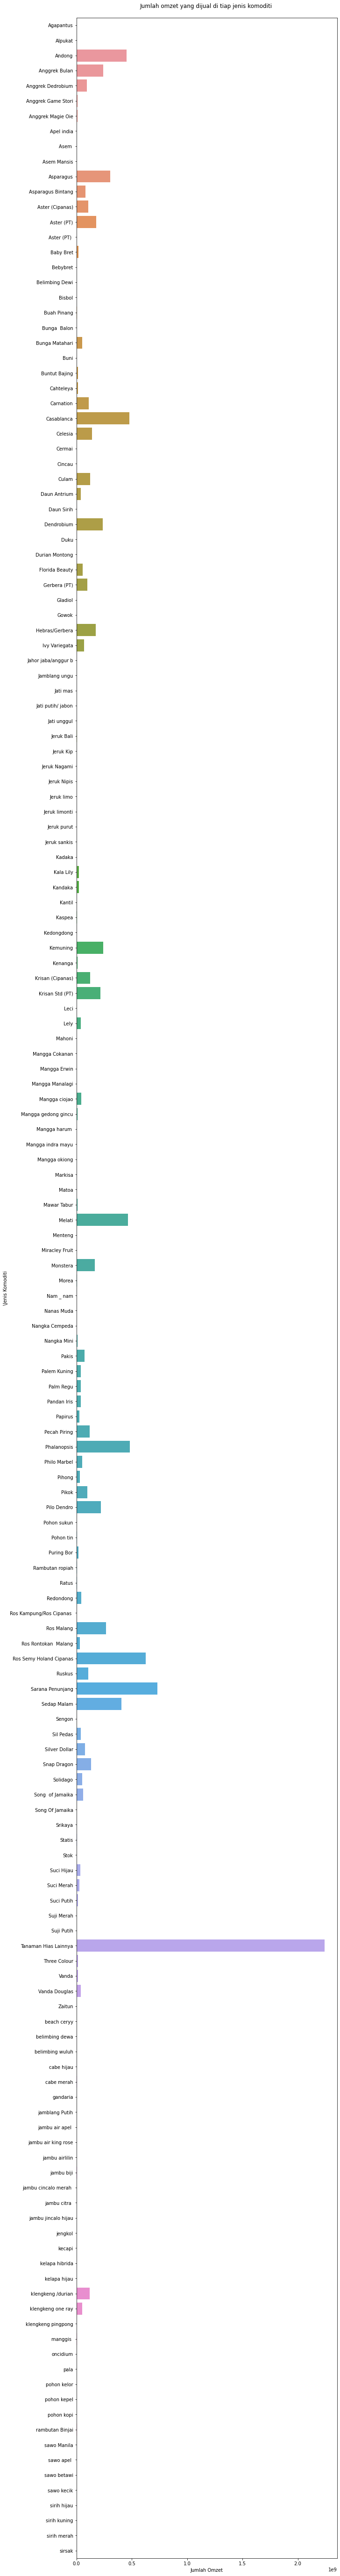

In [33]:
# Menampilkan grafik jumlah omzet tiap jenis komoditi
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 100))

# Plot the total crashes
sns.set_color_codes("pastel")

sns.barplot(x='omzet', y='jenis_komoditi', data=df_sum_omzet_jenis)
ax.set_title('Jumlah omzet yang dijual di tiap jenis komoditi \n')
ax.set_ylabel('\Jenis Komoditi')
ax.set_xlabel('Jumlah Omzet')
plt.show()

--------

## Mengetahui banyaknya penjualan tiap lokasi

In [34]:
# Menampilkan data banyaknya penjualan tiap lokasi
df.lokasi_penjualan.value_counts()

Penangkar Bibit Ragunan    84
Pasar Bunga Rawabelong     71
TC Klender                 21
Taman Anggrek Ragunan       6
Name: lokasi_penjualan, dtype: int64

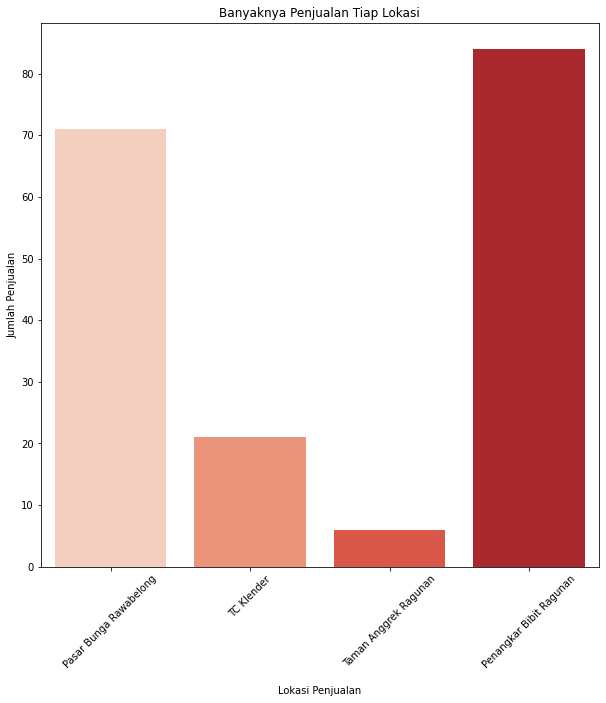

In [35]:
# Menampilkan grafik banyaknya penjualan tiap lokasi
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='lokasi_penjualan' , data=df, palette='Reds')
plt.xticks(rotation=45)
ax.set_title('Banyaknya Penjualan Tiap Lokasi')
ax.set_ylabel('Jumlah Penjualan')
ax.set_xlabel('\nLokasi Penjualan')
plt.show()

----

## Mengetahui banyaknya penjualan tiap jenis komoditi

In [36]:
# Menampilkan data banyaknya penjualan tiap jenis komoditi
df.jenis_komoditi.value_counts()

Pikok                      2
Ros Malang                 2
Hebras/Gerbera             2
Aster (Cipanas)            2
Ros Semy Holand Cipanas    2
                          ..
Redondong                  1
Mangga ciojao              1
Kaspea                     1
Markisa                    1
sawo apel                  1
Name: jenis_komoditi, Length: 168, dtype: int64

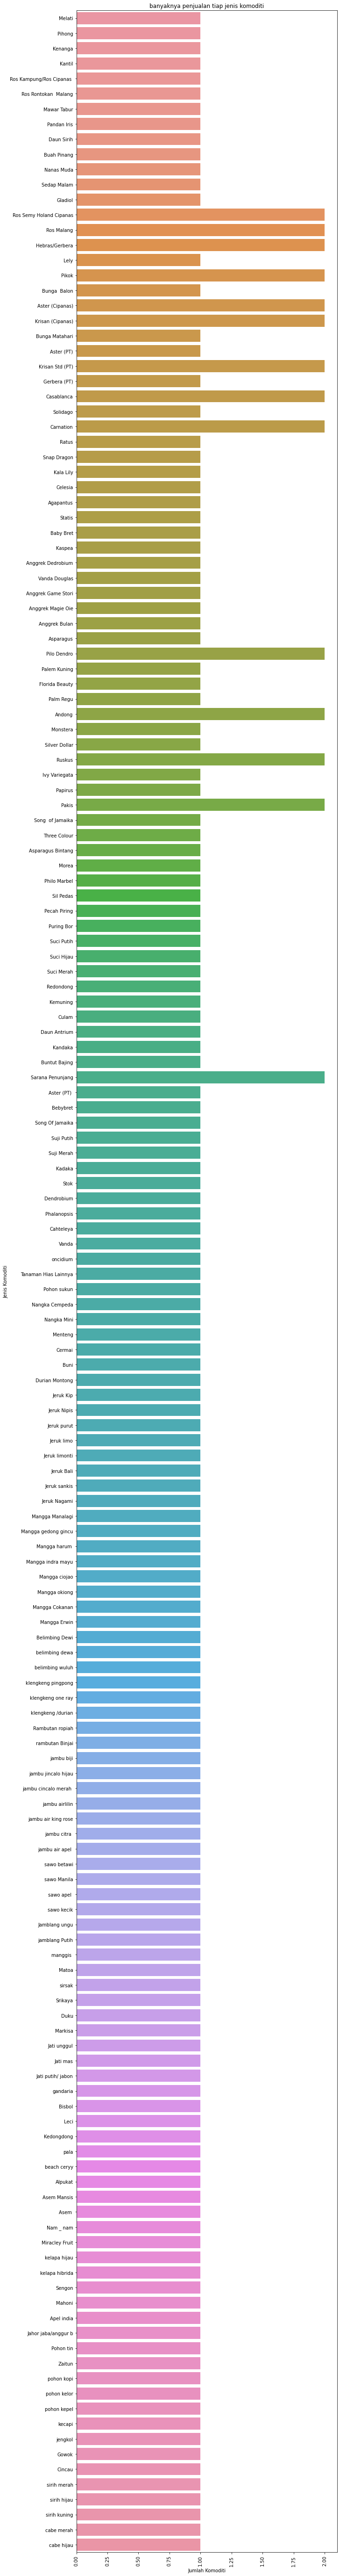

In [37]:
# Menampilkan grafik banyaknya penjualan tiap jenis komoditi
f, ax = plt.subplots(figsize=(10, 100))
sns.countplot(y='jenis_komoditi' , data=df)
plt.xticks(rotation=90)
ax.set_title('banyaknya penjualan tiap jenis komoditi')
ax.set_xlabel('Jumlah Komoditi')
ax.set_ylabel('Jenis Komoditi')
plt.show()

In [38]:
# Jenis komoditi yang jumlah penjualan terbanyak
a = df.jenis_komoditi.value_counts() == 2
df.jenis_komoditi.value_counts()[a]

Pikok                      2
Ros Malang                 2
Hebras/Gerbera             2
Aster (Cipanas)            2
Ros Semy Holand Cipanas    2
Pilo Dendro                2
Andong                     2
Carnation                  2
Krisan (Cipanas)           2
Krisan Std (PT)            2
Ruskus                     2
Pakis                      2
Sarana Penunjang           2
Casablanca                 2
Name: jenis_komoditi, dtype: int64

-----

## Menampilkan data dalam bentuk pivot tabel

In [39]:
# Menampilkan data omzet berdasarkan lokasi penjualan dan jenis komoditi
pivot_result = df.pivot_table(values='omzet', index=['lokasi_penjualan', 'jenis_komoditi'], aggfunc={'omzet':'sum'})
pivot_result

omzet
lokasi_penjualan       jenis_komoditi                  
Pasar Bunga Rawabelong Agapantus                 750000
                       Andong                 450340000
                       Anggrek Bulan          244340000
                       Anggrek Dedrobium       95200000
                       Anggrek Game Stori      12300000
...                                                 ...
Taman Anggrek Ragunan  Dendrobium             238050000
                       Phalanopsis            481750000
                       Tanaman Hias Lainnya  2242500000
                       Vanda                   13750000
                       oncidium                 3150000

[182 rows x 1 columns]

In [40]:
# Menampilkan data penjualan di Pasar Bunga Rawabelong 
PBR = pivot_result.loc['Pasar Bunga Rawabelong']
PBR

,omzet
jenis_komoditi,
Agapantus,750000
Andong,450340000
Anggrek Bulan,244340000
Anggrek Dedrobium,95200000
Anggrek Game Stori,12300000
...,...
Suci Hijau,36000000
Suci Merah,25080000
Suci Putih,16440000


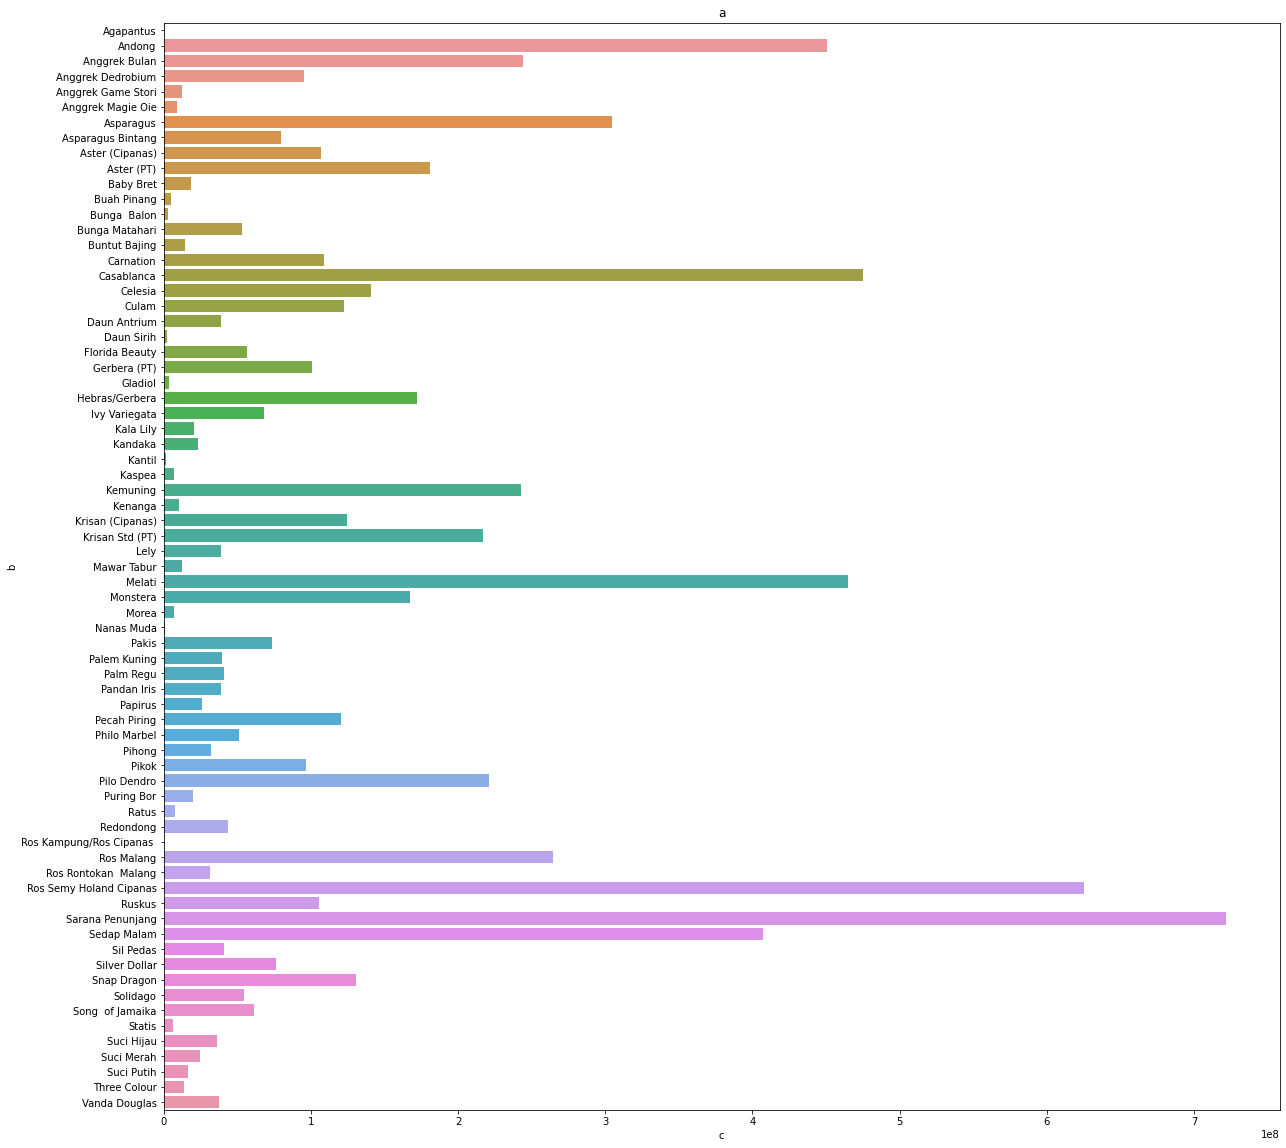

In [41]:
f, ax = plt.subplots(figsize=(20, 20))

# Plot the total crashes
sns.set_color_codes("pastel")

sns.barplot(x=PBR['omzet'], y=PBR.index, data=PBR)
ax.set_title('a')
ax.set_ylabel('b')
ax.set_xlabel('c')
plt.show()

In [42]:
# Menampilkan data penjualan di Penangkar Bibit Ragunan 
Ragunan = pivot_result.loc['Penangkar Bibit Ragunan']
Ragunan

,omzet
jenis_komoditi,
Alpukat,600000
Apel india,90000
Asem,1400000
Asem Mansis,75000
Belimbing Dewi,900000
...,...
sawo kecik,1200000
sirih hijau,1600000
sirih kuning,2400000


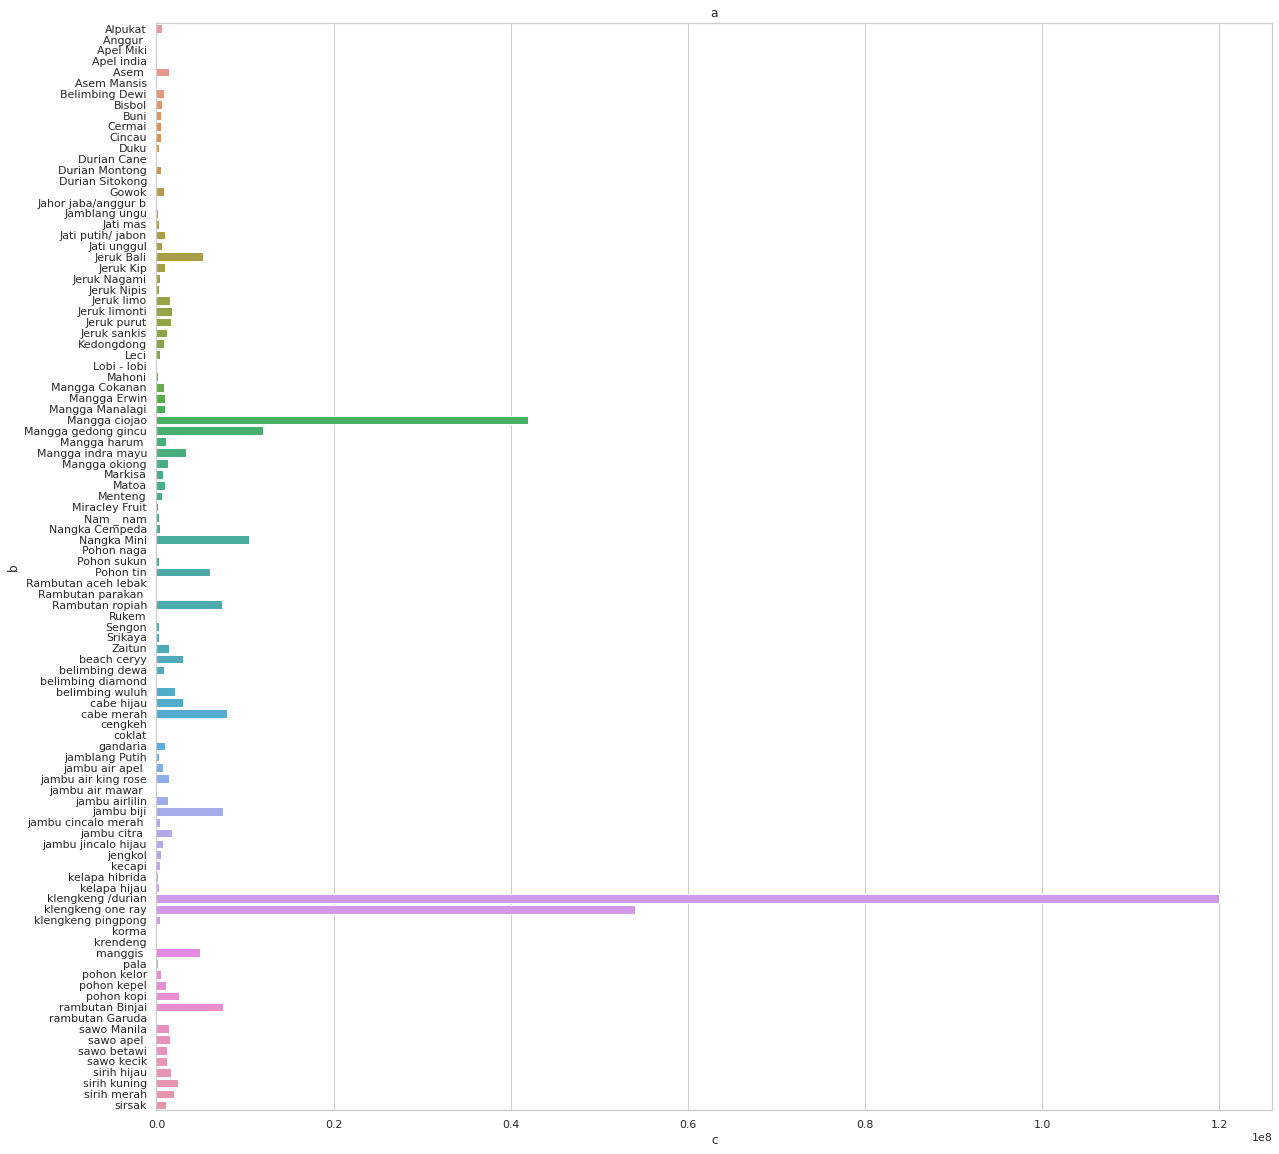

In [190]:
f, ax = plt.subplots(figsize=(20, 20))

# Plot the total crashes
sns.set_color_codes("pastel")

sns.barplot(x=Ragunan['omzet'], y=Ragunan.index, data=Ragunan)
ax.set_title('a')
ax.set_ylabel('b')
ax.set_xlabel('c')
plt.show()

In [43]:
# Menampilkan data penjualan di TC Klender
Klender = pivot_result.loc['TC Klender']
Klender

,omzet
jenis_komoditi,
Andong,1985000
Aster (Cipanas),2096500
Aster (PT),1299000
Bebybret,2190000
Carnation,1220000
Casablanca,5060000
Hebras/Gerbera,2770000
Kadaka,710000
Krisan (Cipanas),1581000


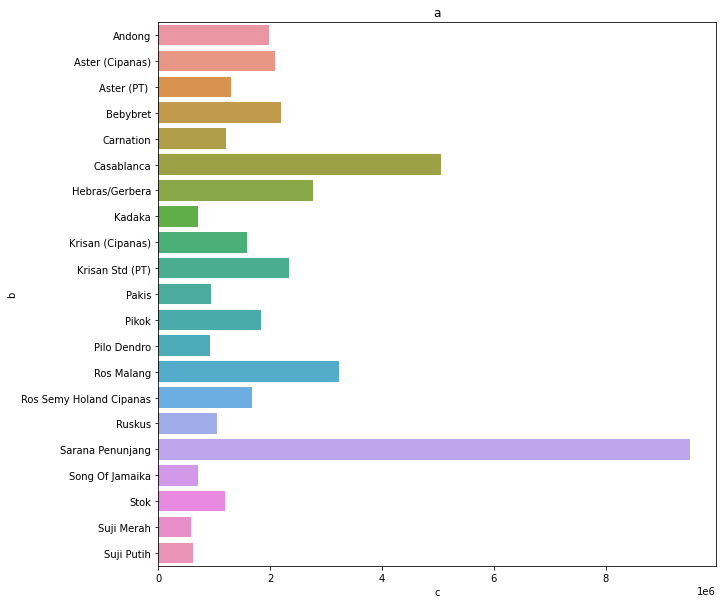

In [44]:
f, ax = plt.subplots(figsize=(10, 10))

# Plot the total crashes
sns.set_color_codes("pastel")

sns.barplot(x=Klender['omzet'], y=Klender.index, data=Klender)
ax.set_title('a')
ax.set_ylabel('b')
ax.set_xlabel('c')
plt.show()

In [45]:
# Menampilkan data penjualan di Taman Anggrek Ragunan
TRA = pivot_result.loc['Taman Anggrek Ragunan']
TRA

,omzet
jenis_komoditi,
Cahteleya,15750000
Dendrobium,238050000
Phalanopsis,481750000
Tanaman Hias Lainnya,2242500000
Vanda,13750000
oncidium,3150000


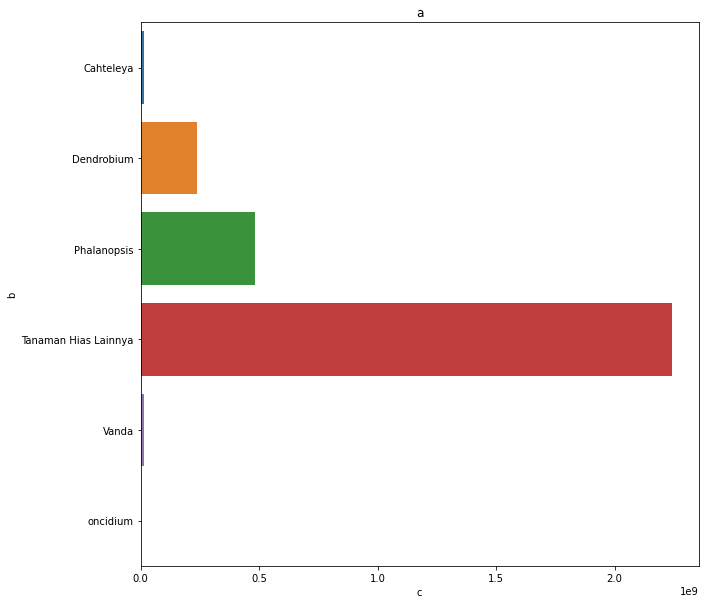

In [46]:
f, ax = plt.subplots(figsize=(10, 10))

# Plot the total crashes
sns.set_color_codes("pastel")

sns.barplot(x=TRA['omzet'], y=TRA.index, data=TRA)
ax.set_title('a')
ax.set_ylabel('b')
ax.set_xlabel('c')
plt.show()

----